In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
!pip install opencv-python


In [5]:
import cv2

In [6]:
pimg = '/content/drive/MyDrive/Dataset/Parasite/C100P61ThinF_IMG_20150918_144104_cell_162.png'
uimg = '/content/drive/MyDrive/Dataset/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png'

Text(0.5, 1.0, 'Affected')

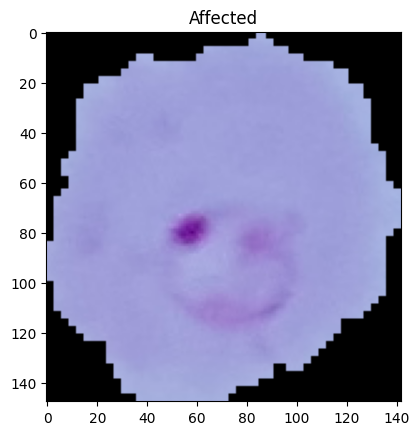

In [7]:
image = cv2.imread(pimg)
plt.imshow(image)
plt.title('Affected')

In [10]:
import os
import matplotlib.pyplot as plt

def plot_images_subplots(directory,rows,cols):
    files = os.listdir(directory)

    total_subplots = rows * cols

    
    fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

    
    for i in range(total_subplots):
        if i >= len(files):
            break

        file = files[i]
        image_path = os.path.join(directory, file)
        image = plt.imread(image_path)

        row = i // cols
        col = i % cols

        axes[row, col].imshow(image)
        axes[row, col].axis('off')
        
    plt.tight_layout()
    plt.show()





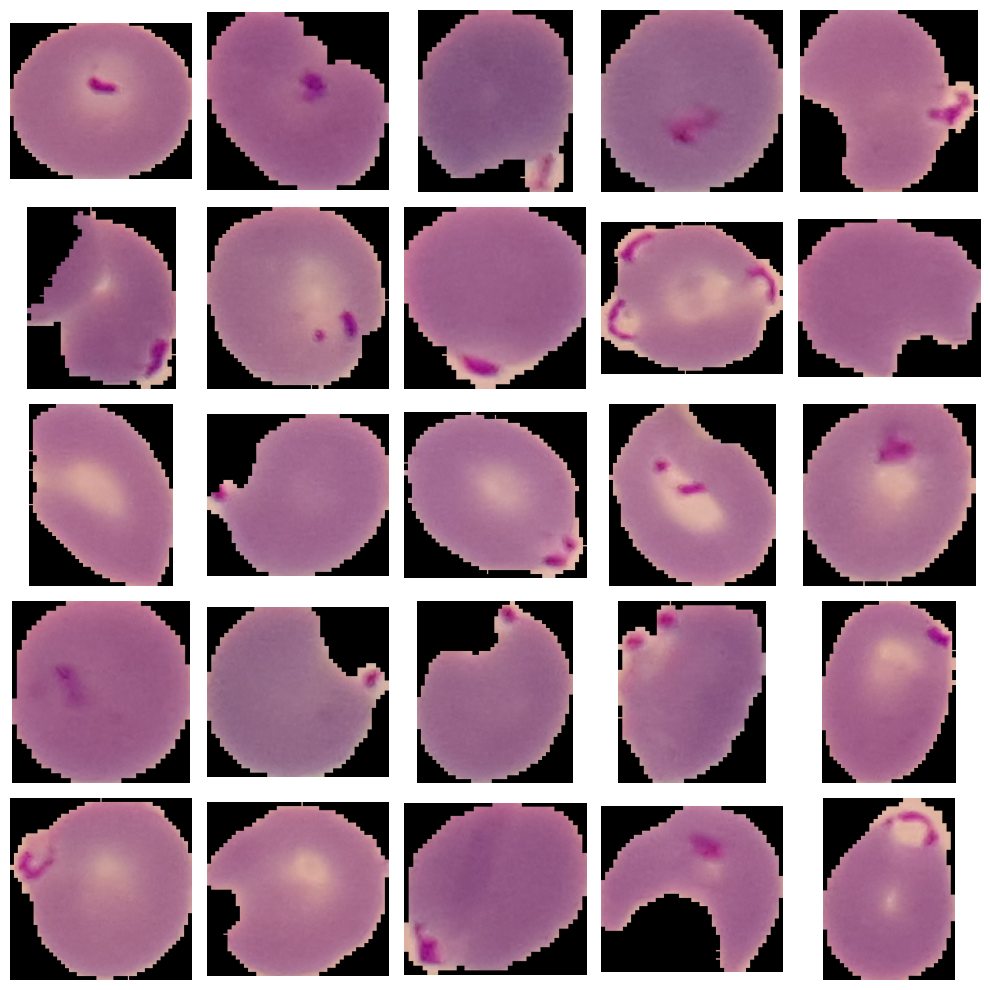

In [11]:
plot_images_subplots( '/content/drive/MyDrive/Dataset/Parasite',5,5)

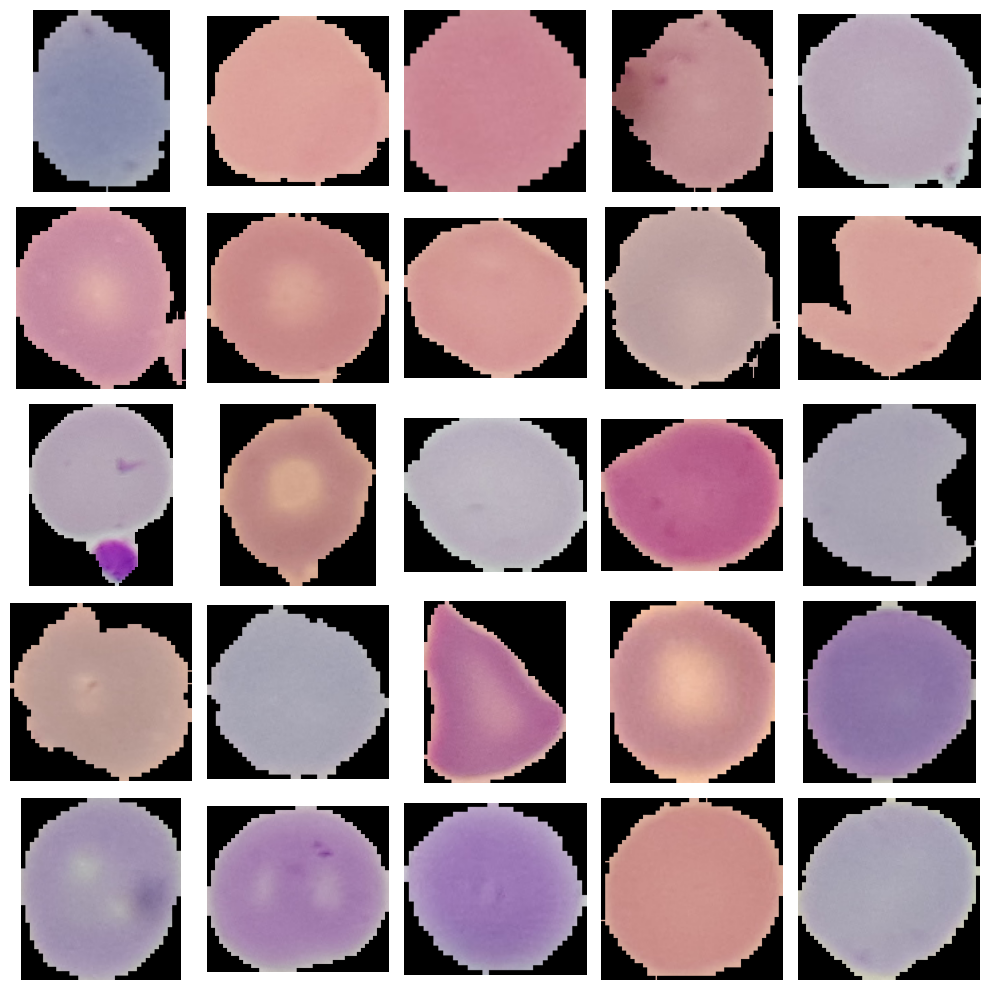

In [12]:
plot_images_subplots('/content/drive/MyDrive/Dataset/Unif',5,5)

In [13]:
import os
directory = '/content/drive/MyDrive/Dataset'
train_path = '/content/drive/MyDrive/Dataset/train'
test_path = '/content/drive/MyDrive/Dataset/test'
files = os.listdir(directory)
len(files)

2

In [14]:
x = len(os.listdir(directory+'/Parasite'))
y =len(os.listdir(directory+'/Unif'))

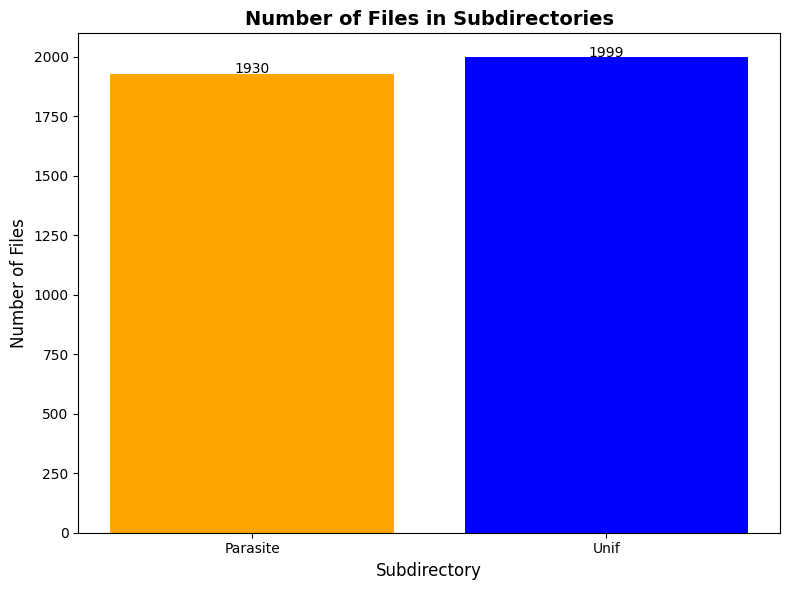

In [15]:
import matplotlib.pyplot as plt

labels = ['Parasite', 'Unif']
counts = [x, y]

plt.figure(figsize=(8, 6))  

colors = ['orange', 'blue']
plt.bar(labels, counts, color=colors)

plt.xlabel('Subdirectory', fontsize=12) 
plt.ylabel('Number of Files', fontsize=12) 
plt.title('Number of Files in Subdirectories', fontsize=14, fontweight='bold') 
for i, count in enumerate(counts):
    plt.text(i, count + 0.2, str(count), ha='center', fontsize=10)

plt.xticks(fontsize=10)  
plt.yticks(fontsize=10)  


plt.tight_layout()  


plt.show()


In [16]:
## Checking the dimensions of the images

In [17]:
dim1=[]
dim2=[]

for image_filename in os.listdir(directory+'/Unif'):
    img=cv2.imread(directory+'/Unif/'+image_filename)

    d1,d2,colors=img.shape
    dim1.append(d1)
    dim2.append(d2)

In [18]:
print(np.mean(dim1))
print(np.mean(dim2))

131.50825412706354
131.28614307153578


In [19]:
np.mean(dim2)

131.28614307153578

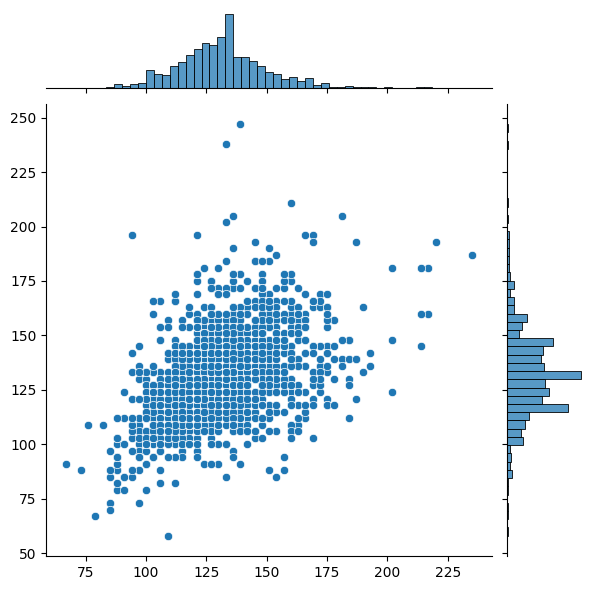

In [20]:
import seaborn as sns
sns.jointplot(x= dim1 , y = dim2)

In [21]:
height = 128
width = 128

In [22]:
datagen = ImageDataGenerator(
    rescale=1/255.0,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
testDatagen = ImageDataGenerator(rescale=1/255.0) 

In [23]:
trainDatagen = datagen.flow_from_directory(train_path,
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='training')

Found 3144 images belonging to 2 classes.


In [24]:


testDatagen = testDatagen.flow_from_directory(test_path,
                                                  target_size=(width, height),
                                                  class_mode='binary',
                                                  batch_size=16)
valDatagen = datagen.flow_from_directory(train_path,
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='validation')

Found 785 images belonging to 2 classes.


# CNN - Layers


In [25]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(132,132,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 130, 130, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 65, 65, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 65, 65, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 63, 63, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 31, 31, 32)        0

In [34]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [35]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [49]:
model.save('my_cnn.h5')

In [36]:
result=model.fit(trainDatagen,epochs=50,validation_data=valDatagen)

Epoch 1/50
197/197 [==============================] - 29s 136ms/step - loss: 0.4021 - accuracy: 0.8111 - val_loss: 0.7065 - val_accuracy: 0.5758
Epoch 2/50
197/197 [==============================] - 26s 133ms/step - loss: 0.3954 - accuracy: 0.8263 - val_loss: 0.6309 - val_accuracy: 0.6548
Epoch 3/50
197/197 [==============================] - 25s 129ms/step - loss: 0.3870 - accuracy: 0.8263 - val_loss: 0.5738 - val_accuracy: 0.7159
Epoch 4/50
197/197 [==============================] - 28s 140ms/step - loss: 0.3781 - accuracy: 0.8352 - val_loss: 0.6240 - val_accuracy: 0.6688
Epoch 5/50
197/197 [==============================] - 26s 130ms/step - loss: 0.3934 - accuracy: 0.8222 - val_loss: 1.0729 - val_accuracy: 0.5057
Epoch 6/50
197/197 [==============================] - 25s 129ms/step - loss: 0.3594 - accuracy: 0.8346 - val_loss: 0.8166 - val_accuracy: 0.4917
Epoch 7/50
197/197 [==============================] - 25s 128ms/step - loss: 0.3210 - accuracy: 0.8725 - val_loss: 0.4361 - val_ac

In [37]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

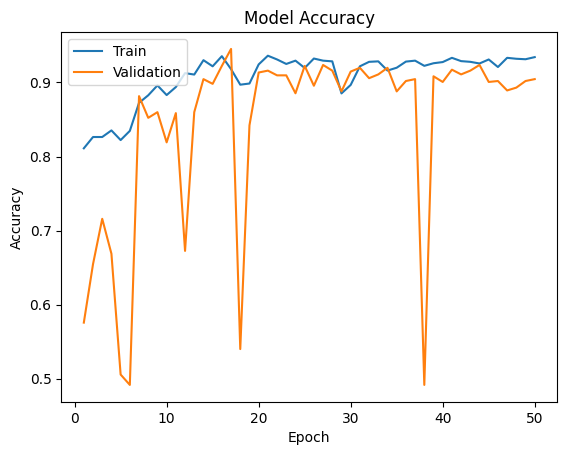

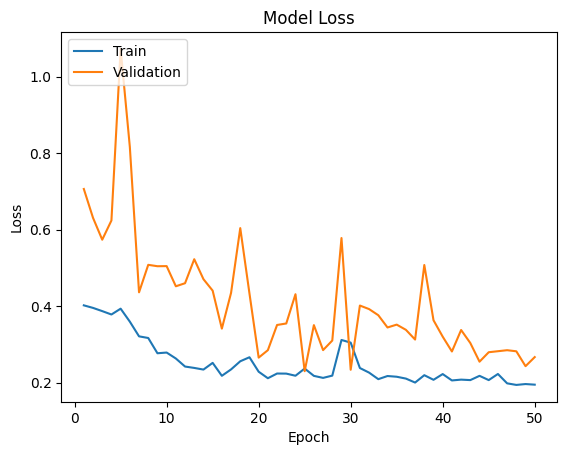

In [38]:
plotLearningCurve(result,50)

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
model.metrics_names

['loss', 'accuracy']

In [41]:
pred=model.predict(testDatagen)

50/50 [==============================] - 6s 117ms/step


In [42]:
predictions=pred>0.5

In [43]:
print(classification_report(valDatagen.classes,predictions))

              precision    recall  f1-score   support

           0       0.47      0.54      0.50       386
           1       0.48      0.42      0.45       399

    accuracy                           0.48       785
   macro avg       0.48      0.48      0.48       785
weighted avg       0.48      0.48      0.47       785



In [44]:
acc = []
preciss= []

In [45]:
from sklearn.metrics import precision_score, accuracy_score

In [48]:
predictions = predictions.astype(int)
predict_labels = predictions.flatten()
prec_score = precision_score(valDatagen.classes, predict_labels)
preciss.append(prec_score)
accuracy= accuracy_score(valDatagen.classes, predict_labels)
acc.append(accuracy)





In [47]:
print(acc)
print(preciss)

[0.4764331210191083]
[0.48265895953757226]


# VGG16

In [50]:
from tensorflow.keras.applications.vgg16 import VGG16

In [51]:
training_set = datagen.flow_from_directory(train_path,
                                           target_size=(224,224),
                                           class_mode = 'categorical',
                                           batch_size = 32,
                                           )

Found 3929 images belonging to 2 classes.


In [52]:
test_set =  testdatagen.flow_from_directory(test_path,
                                           target_size=(224,224),
                                           class_mode = 'categorical',
                                           batch_size = 32,
                                           )

Found 3929 images belonging to 2 classes.


In [53]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


58889256/58889256 [==============================] - 0s 0us/step


In [54]:
import tensorflow.keras as keras
from tensorflow.keras.models import Model

In [55]:
x = base_model.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(256, activation='relu')(x)
predictions = keras.layers.Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)


In [56]:
for layer in base_model.layers:
    layer.trainable = False

In [57]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [58]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
plot_model(model, to_file='cnn_model.png', show_shapes=True)

In [59]:
model.save('VGG16_model.h5')

In [61]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [63]:
result1=model.fit(training_set,epochs = 30 ,validation_data=test_set,callbacks=[early_stop])

Epoch 1/30
123/123 [==============================] - 141s 1s/step - loss: 0.2948 - accuracy: 0.8733 - val_loss: 0.2710 - val_accuracy: 0.8834
Epoch 2/30
123/123 [==============================] - 117s 957ms/step - loss: 0.2880 - accuracy: 0.8725 - val_loss: 0.2564 - val_accuracy: 0.8913
Epoch 3/30
123/123 [==============================] - 118s 962ms/step - loss: 0.2614 - accuracy: 0.8913 - val_loss: 0.2501 - val_accuracy: 0.8969
Epoch 4/30
123/123 [==============================] - 140s 1s/step - loss: 0.2629 - accuracy: 0.8875 - val_loss: 0.2530 - val_accuracy: 0.8941
Epoch 5/30
123/123 [==============================] - 141s 1s/step - loss: 0.2686 - accuracy: 0.8829 - val_loss: 0.2477 - val_accuracy: 0.8972
Epoch 6/30
123/123 [==============================] - 115s 940ms/step - loss: 0.2648 - accuracy: 0.8862 - val_loss: 0.2822 - val_accuracy: 0.8702
Epoch 7/30
123/123 [==============================] - 114s 934ms/step - loss: 0.2647 - accuracy: 0.8878 - val_loss: 0.2702 - val_accu

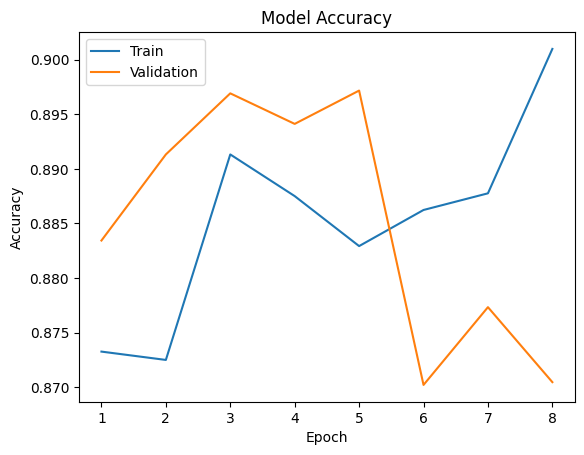

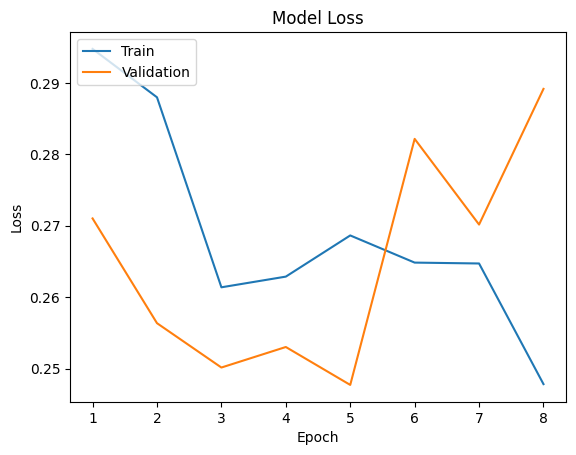

In [65]:
plotLearningCurve(result1,8)

In [66]:
predict = model.predict(test_set)
predict

123/123 [==============================] - 58s 473ms/step


array([[9.9771523e-01, 2.2847587e-03],
       [9.8714232e-01, 1.2857670e-02],
       [8.7214140e-03, 9.9127859e-01],
       ...,
       [8.2258526e-03, 9.9177414e-01],
       [1.2426817e-02, 9.8757321e-01],
       [9.9993348e-01, 6.6491171e-05]], dtype=float32)

In [67]:
test_set.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [68]:
test_set.classes[0]

0

In [69]:
import  numpy as np
preddict = np.argmax(predict,axis = 1)
preddict

array([0, 0, 1, ..., 1, 1, 0])

In [70]:
print(classification_report(test_set.classes,preddict))

              precision    recall  f1-score   support

           0       0.50      0.58      0.54      1930
           1       0.52      0.44      0.48      1999

    accuracy                           0.51      3929
   macro avg       0.51      0.51      0.51      3929
weighted avg       0.51      0.51      0.51      3929



In [71]:
preddict = preddict.astype(int)
predict_labels = preddict.flatten()
prec_score = precision_score(test_set.classes, preddict)
preciss.append(prec_score)
accuracy= accuracy_score(test_set.classes, predict_labels)
acc.append(accuracy)


# Resnet


In [72]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [73]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))




94765736/94765736 [==============================] - 0s 0us/step


In [74]:
x = base_model.output
x

<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>

In [75]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

In [76]:
model = Model(inputs=base_model.input, outputs=predictions)

In [78]:
for layer in base_model.layers:
    layer.trainable = False

In [80]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [79]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [84]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   validation_split = 0.2,
                                   horizontal_flip=True)






batch_size = 32
image_size = (224, 224)

train_generator = datagen.flow_from_directory(train_path,
                                                    target_size=image_size,
                                                    batch_size=batch_size,
                                                    class_mode='binary')


test_generator = testDatagen.flow_from_directory(test_path,
                                                  target_size=image_size,
                                                  batch_size=batch_size,
                                                  class_mode='binary')




Found 3929 images belonging to 2 classes.
Found 3929 images belonging to 2 classes.


In [86]:

result = model.fit(train_generator,
          epochs=20,
          validation_data=test_generator)

Epoch 1/20
123/123 [==============================] - 109s 889ms/step - loss: 0.6450 - accuracy: 0.6213 - val_loss: 0.6235 - val_accuracy: 0.6648
Epoch 2/20
123/123 [==============================] - 138s 1s/step - loss: 0.6409 - accuracy: 0.6253 - val_loss: 0.6646 - val_accuracy: 0.5986
Epoch 3/20
123/123 [==============================] - 110s 895ms/step - loss: 0.6296 - accuracy: 0.6442 - val_loss: 0.6072 - val_accuracy: 0.6556
Epoch 4/20
123/123 [==============================] - 137s 1s/step - loss: 0.6498 - accuracy: 0.6215 - val_loss: 0.7718 - val_accuracy: 0.5139
Epoch 5/20
123/123 [==============================] - 110s 897ms/step - loss: 0.6429 - accuracy: 0.6266 - val_loss: 0.7442 - val_accuracy: 0.5164
Epoch 6/20
123/123 [==============================] - 108s 882ms/step - loss: 0.6247 - accuracy: 0.6465 - val_loss: 0.6001 - val_accuracy: 0.6928
Epoch 7/20
123/123 [==============================] - 109s 888ms/step - loss: 0.6108 - accuracy: 0.6661 - val_loss: 0.6103 - val_a

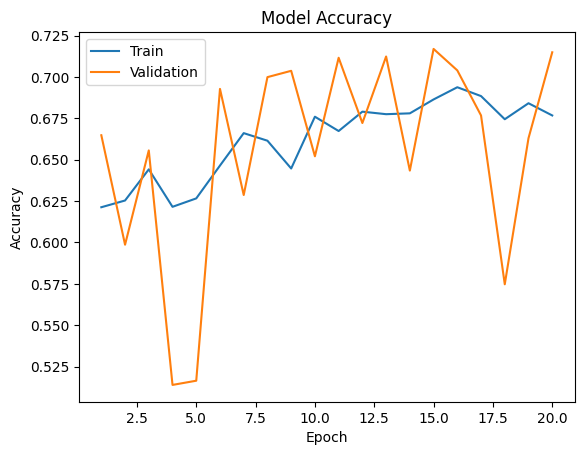

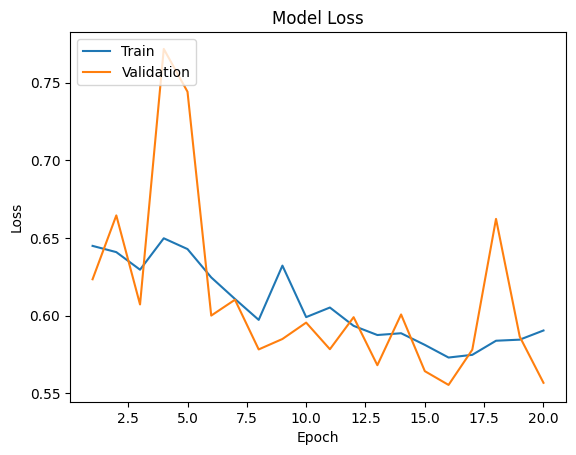

In [89]:
plotLearningCurve(result,20)

In [90]:
predict = model.predict(test_generator)
predict

123/123 [==============================] - 58s 464ms/step


array([[0.5872049 ],
       [0.7948378 ],
       [0.3485117 ],
       ...,
       [0.34748486],
       [0.7618    ],
       [0.51337975]], dtype=float32)

In [91]:
preddict = predict>0.5
preddict = preddict.astype(int)
predict_labels = preddict.flatten()
predict_labels



array([1, 1, 0, ..., 0, 1, 1])

In [92]:
len(test_generator.classes)

3929

In [93]:
print(classification_report(test_generator.classes,predict_labels))


              precision    recall  f1-score   support

           0       0.49      0.45      0.47      1930
           1       0.51      0.55      0.53      1999

    accuracy                           0.50      3929
   macro avg       0.50      0.50      0.50      3929
weighted avg       0.50      0.50      0.50      3929



In [94]:
prec_score = precision_score(test_generator.classes, predict_labels)
preciss.append(prec_score)
accuracy= accuracy_score(test_generator.classes, predict_labels)

acc.append(accuracy)


 Comparison

In [95]:
import pandas as pd
df = pd.DataFrame({'Accuracy': acc, 'Precision': preciss})

In [104]:
df

,index,Accuracy,Precision
0,0,0.476433,0.482659
1,2,0.508272,0.519834
2,3,0.501145,0.509091


In [102]:
df.reset_index(inplace = True)

Text(0.5, 1.0, 'Accuracy and Precision Comparison')

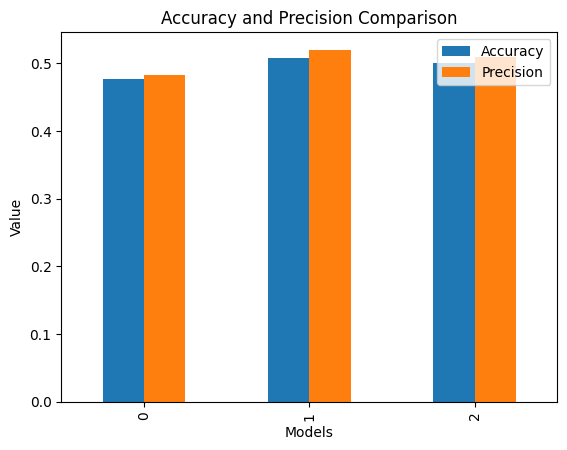

In [106]:
df.plot(x=None, y=['Accuracy', 'Precision'], kind='bar')
plt.xlabel('Models')
plt.ylabel('Value')
plt.title('Accuracy and Precision Comparison')